**GROVER'S ALGORITHM**

It allows us to find the key in an unsorted data base in the order of square root of N computations with maximum probability of correct target whereas the classical algorithms can do so only in the order of N computations.

Here we shall be implementing for n=4 qubits or N=16 values where the key shall be 1111.

In [1]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the so

In [3]:
!pip install qiskit pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
n=4
from qiskit import QuantumCircuit
import math
qc=QuantumCircuit(n)
qc.h(range(n))
N=2**n;
k = math.floor((math.pi / 4) * math.sqrt(N))  # Optimal number of iterations

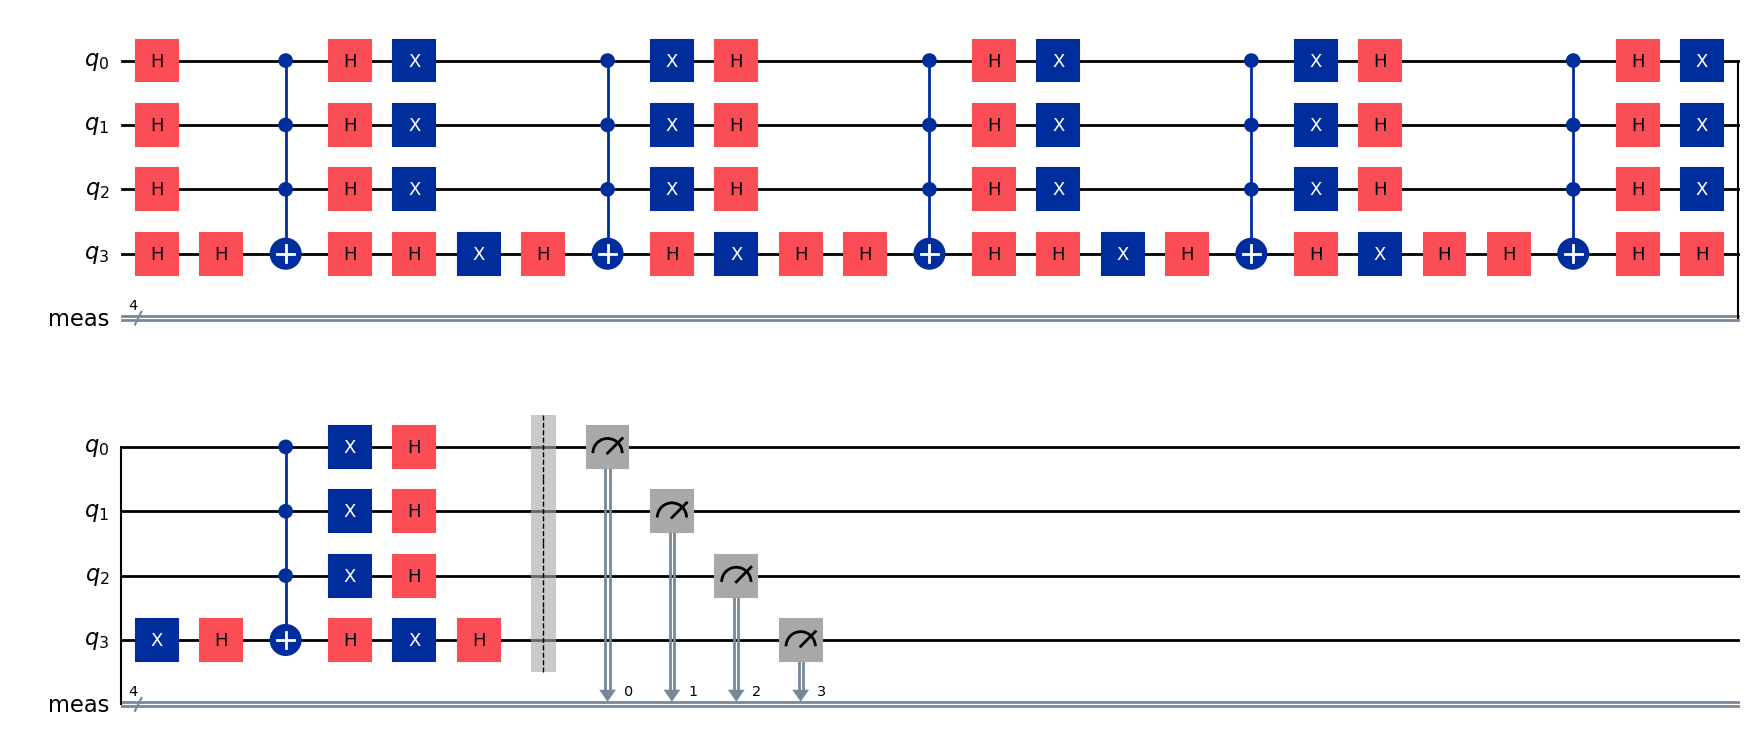

In [4]:
def oracle(circuit):      #phase flip operator for 1111. flips the phase only for the target key and all other staes remain same.
  circuit.h(n-1)
  circuit.mcx(list(range(n-1)), n-1)
  circuit.h(n-1)

#Diffusion operator
def diffusion(circuit):
  circuit.h(range(n))
  circuit.x(range(n))
  circuit.h(n-1)
  circuit.mcx(list(range(n-1)), n-1)
  circuit.h(n-1)
  circuit.x(range(n))
  circuit.h(range(n))

for i in range (k):    #applying the opertions for desired number of iterations
  oracle(qc)
  diffusion(qc)

qc.measure_all(add_bits=True)
qc.draw('mpl')

In [5]:
from qiskit_aer import AerSimulator
from qiskit import transpile
sim = AerSimulator()
qc_transpiled = transpile(qc, sim)

# Step 3: Run the simulation
job = sim.run(qc_transpiled, shots=1024)
result = job.result()

# Step 4: Get classical counts
counts = result.get_counts()

# Step 5: Print the result
print("Classical Measurement Counts:")
for bitstring, count in counts.items():
    print(f"{bitstring}: {count}")

Classical Measurement Counts:
1101: 2
1100: 4
1111: 972
0001: 3
0010: 5
0000: 2
1010: 6
1000: 3
0110: 9
1110: 4
1001: 3
0101: 3
1011: 2
0111: 1
0011: 2
0100: 3


Now as shown due the resulting operations only one state that is corresponding to the key survives and the rest are almost completely destroyed via destructive interference.